# <span style="color:black;">**Proyecto Integrado III - Analítica de Datos**</span>


### <span style="color:black;"> **Evidencia de Aprendizaje 2** </span><br><br>

#### **Nombres Integrantes:**
####- Nikol Tamayo Rúa - CC: 1000.661.591
####- Adriana María Aguilar Viloria - CC: 43.265.921
####- Edwin Bernardo Villa Sánchez - CC: 3.396.980


#### <br><span style="color:black;">**Programa:** </span><span style="color:black;">Ingeniería de Software y Datos</span><br>


#### <span style="color:black;">**Código de grupo:** </span><span style="color:black;">PREICA2402B020106</span><br>


#### <span style="color:black;">**Docente:** </span><span style="color:black;">SHARON KARIN CAMACHO</span><br>


### <span style="color:black;">**Facultad Ingenierías y Ciencias Agropecuarias - Institución Universitaria Digital de Antioquia 2024**</span><br>

## **Planeación:**
Link del tablero en Trello: https://trello.com/invite/b/671aec40946234082bbf5cfc/ATTI92bef132fa6eee69e9c8730c47010fa3D2C08280/proyectointegrado

## **Instrucciones:**

La actividad tiene como objetivo asegurar la calidad del conjunto de datos para un análisis efectivo. Se divide en tres etapas:

Descripción de Necesidades de Limpieza
Limpieza y Transformación de Datos
Validación

## **I Descripción de Necesidades de Limpieza:**

Antes de realizar cualquier cambio en el dataset, realiza un análisis detallado de las necesidades de limpieza y transformación, considera lo que hiciste en la evidencia de aprendizaje 1 y valida si existen más aspectos.

Describe las necesidades de limpieza en los siguientes aspectos:

*Duplicados: Indica si existen duplicados en el dataset y en qué columnas podrían estar.

*Valores Nulos: Identifica las columnas con valores nulos, la proporción de datos faltantes y la posible relevancia de estos para el análisis.

*Inconsistencias en Valores: Revisa si existen valores inconsistentes o errores tipográficos en columnas clave, como nombres de ciudades, categorías, o fechas.

*Tipos de Datos: Identifica columnas cuyo tipo de dato no es adecuado y describe qué tipo de corrección es necesario realizar.

*Valores Atípicos: Describe variables en las que los valores atípicos pueden ser problemáticos y considera si estos necesitan un tratamiento especial.

*Nivel de Granularidad: Evalúa si el dataset tiene un nivel de detalle mayor al requerido (por ejemplo, datos diarios cuando solo se necesitan datos mensuales). Considera si es necesario agregar datos para lograr la granularidad deseada.

Documenta tus observaciones y justifica por qué es necesario abordar cada aspecto.

  





In [ ]:
#Suite de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
from scipy.stats import zscore
from google.colab import files

In [ ]:
#Carga los datos de dataset
# ID del archivo en Google Drive
url="https://drive.google.com/file/d/1mS9LpAYBj6QDmJvOKV7932e7Jq8JaQrV/view?usp=drive_link"
file_id = "1mS9LpAYBj6QDmJvOKV7932e7Jq8JaQrV"

# Descargar el archivo desde Google Drive
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", "user_behavior.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1mS9LpAYBj6QDmJvOKV7932e7Jq8JaQrV
To: /content/user_behavior.csv
100%|██████████| 38.9k/38.9k [00:00<00:00, 36.2MB/s]


'user_behavior.csv'

In [ ]:
# Leer el archivo CSV
df = pd.read_csv("user_behavior.csv", low_memory=False)

### **Duplicados**

In [ ]:
# Verificar si hay filas duplicadas en todo el DataFrame
duplicados_totales = df.duplicated()

# Mostrar las filas que son duplicadas
filas_duplicadas = df[df.duplicated()]

# Contar el número de filas duplicadas
numero_duplicados = df.duplicated().sum()

# Si deseas ver duplicados basándote en un subconjunto de columnas, por ejemplo, 'User ID'
duplicados_user_id = df.duplicated(subset='User ID')

# Para mantener la primera aparición y marcar el resto como duplicados
duplicados_keep_first = df.duplicated(keep='first')

# Para mantener la última aparición y marcar el resto como duplicados
duplicados_keep_last = df.duplicated(keep='last')

# Para eliminar duplicados, manteniendo la primera aparición de cada duplicado
df_sin_duplicados = df.drop_duplicates()

# O eliminar duplicados basados en una columna específica, manteniendo la primera aparición
df_sin_duplicados_user_id = df.drop_duplicates(subset='User ID')

# Mostrar los resultados
print("Filas duplicadas en todo el DataFrame:")
print(filas_duplicadas)
print(f"\nNúmero total de filas duplicadas: {numero_duplicados}")
print("\nFilas duplicadas basadas en 'User ID':")
print(df[duplicados_user_id])

# Si quieres ver cómo se marcan los duplicados:
print("\nMarcado de duplicados (manteniendo la primera aparición):")
print(duplicados_keep_first)

Filas duplicadas en todo el DataFrame:
Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []

Número total de filas duplicadas: 0

Filas duplicadas basadas en 'User ID':
Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []

Marcado de duplicados (manteniendo la primera aparición):
0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool


Estado general del dataset:

No existen filas duplicadas en el dataset completo ni al considerar únicamente la columna User ID. Esto asegura que cada registro es único y no se tienen observaciones repetidas que puedan sesgar el análisis.

### **Valores Nulos**

In [ ]:
# Verificar si hay valores nulos en cada celda del DataFrame
valores_nulos = df.isnull()

# Sumar los valores nulos por columna
suma_valores_nulos = df.isnull().sum()

# Porcentaje de valores nulos por columna
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

# Información general sobre valores nulos
info_nulos = df.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print("Matriz de valores nulos:")
print(valores_nulos)
print("\nSuma de valores nulos por columna:")
print(suma_valores_nulos)
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)
print("\nInformación ordenada de valores nulos:")
print(info_nulos)

# Para verificar la cantidad total de valores nulos en todo el DataFrame
total_nulos = df.isnull().sum().sum()
print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")

Matriz de valores nulos:
     User ID  Device Model  Operating System  App Usage Time (min/day)  \
0      False         False             False                     False   
1      False         False             False                     False   
2      False         False             False                     False   
3      False         False             False                     False   
4      False         False             False                     False   
..       ...           ...               ...                       ...   
695    False         False             False                     False   
696    False         False             False                     False   
697    False         False             False                     False   
698    False         False             False                     False   
699    False         False             False                     False   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         

Estado general del dataset:

No existen valores nulos en ninguna de las columnas. Esto significa que no hay datos faltantes que puedan comprometer el análisis o requerir técnicas de imputación

### **Inconsistencias en Valores**

No se evidencia inconsistencia en los valores, como valores nulos, errores tipográficos o valores fuera del rango. En el caso de la variable User Behavior Class que tiene valores entre 1 a 5 siguen el formato correcto, no es necesario realizar ninguna corrección. Sin embargo, para mostrar un análisis más comprensible o detallado, se realizará una mejora reemplazando por descripciones los valores de manera más explícita (1. "Uso leve", 2."Uso moderadamente bajo", 3. "Uso moderado", 4. "Uso moderadamente alto", 5. "Uso extremo").

In [ ]:
print(df['User Behavior Class'].value_counts())

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [ ]:
print(df['User Behavior Class'].unique())  # Verifica los valores únicos en la columna

[4 3 2 5 1]


### **Tipos de Datos**

In [ ]:
# tipo de datos de cada columna
tipos_de_datos = df.dtypes

# tipos de datos de manera más detallada
info_dataset = df.info()

# resumen estadístico que también incluye los tipos de datos
resumen = df.describe(include='all')

# Mostrar los resultados
print("Tipos de datos de cada columna:")
print(tipos_de_datos)
print("\nInformación del dataset:")
print(info_dataset)
print("\nResumen estadístico y tipos de datos:")
print(resumen)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
Tipos de datos de cada columna:
User ID                         int64
Device Model         

**Columnas numéricas que necesitan ajustes**

Columnas:
App Usage Time (min/day), Screen On Time (hours/day).

Unidades inconsistentes:

"App Usage Time" está en minutos, mientras que "Screen On Time" está en horas. Para facilitar la comparación, es mejor convertir ambos a una misma unidad (minutos u horas).

Columnas como Device Model, Operating System, y Gender pueden convertirse al tipo category, lo cual reduce el consumo de memoria y acelera las operaciones relacionadas con estas columnas.




### **Valores Atípicos**

In [ ]:
# Mostrar la descripción estadística del dataset
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
# Definimos un diccionario con los valores de Q1, Q3 y calculamos el IQR para cada columna de tipo númerica
columnas_iqr = {
    'App Usage Time (min/day)': {'Q1': 113.25, 'Q3': 434.25},
    'Screen On Time (hours/day)': {'Q1': 2.5, 'Q3': 7.4},
    'Battery Drain (mAh/day)': {'Q1': 722.25, 'Q3': 2229.5},
    'Number of Apps Installed': {'Q1': 26, 'Q3': 74},
    'Data Usage (MB/day)': {'Q1': 373, 'Q3': 1341},
    'Age': {'Q1': 28, 'Q3': 49}
}

# Calculamos los límites inferior y superior para cada columna
outliers = {}

for columna, valores in columnas_iqr.items():
    Q1 = valores['Q1']
    Q3 = valores['Q3']
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtramos valores atípicos en la columna
    outliers_columna = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    outliers[columna] = outliers_columna[columna].values

    print(f"{columna} - Límite Inferior: {limite_inferior}, Límite Superior: {limite_superior}")
    print(f"Valores atípicos en {columna}: {outliers[columna]}")
    print("\n")

App Usage Time (min/day) - Límite Inferior: -368.25, Límite Superior: 915.75
Valores atípicos en App Usage Time (min/day): []


Screen On Time (hours/day) - Límite Inferior: -4.8500000000000005, Límite Superior: 14.75
Valores atípicos en Screen On Time (hours/day): []


Battery Drain (mAh/day) - Límite Inferior: -1538.625, Límite Superior: 4490.375
Valores atípicos en Battery Drain (mAh/day): []


Number of Apps Installed - Límite Inferior: -46.0, Límite Superior: 146.0
Valores atípicos en Number of Apps Installed: []


Data Usage (MB/day) - Límite Inferior: -1079.0, Límite Superior: 2793.0
Valores atípicos en Data Usage (MB/day): []


Age - Límite Inferior: -3.5, Límite Superior: 80.5
Valores atípicos en Age: []




In [ ]:
# Definimos un diccionario únicamente con las columnas númericas
columnas_numericas = {
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age'
}

# Aplicar Z-score en cada columna numérica
outliers_zscore = {}

for columna in columnas_numericas:
    z_scores = zscore(df[columna])
    # Seleccionar los valores con Z-score mayor a 3 o menor a -3
    outliers_columna = df[np.abs(z_scores) > 3]
    outliers_zscore[columna] = outliers_columna[columna].values

# Mostrar posibles outliers detectados por Z-score
for columna, outliers in outliers_zscore.items():
    print(f"Valores atípicos en {columna} (Z-score): {outliers}")

Valores atípicos en App Usage Time (min/day) (Z-score): []
Valores atípicos en Age (Z-score): []
Valores atípicos en Number of Apps Installed (Z-score): []
Valores atípicos en Screen On Time (hours/day) (Z-score): []
Valores atípicos en Battery Drain (mAh/day) (Z-score): []
Valores atípicos en Data Usage (MB/day) (Z-score): []


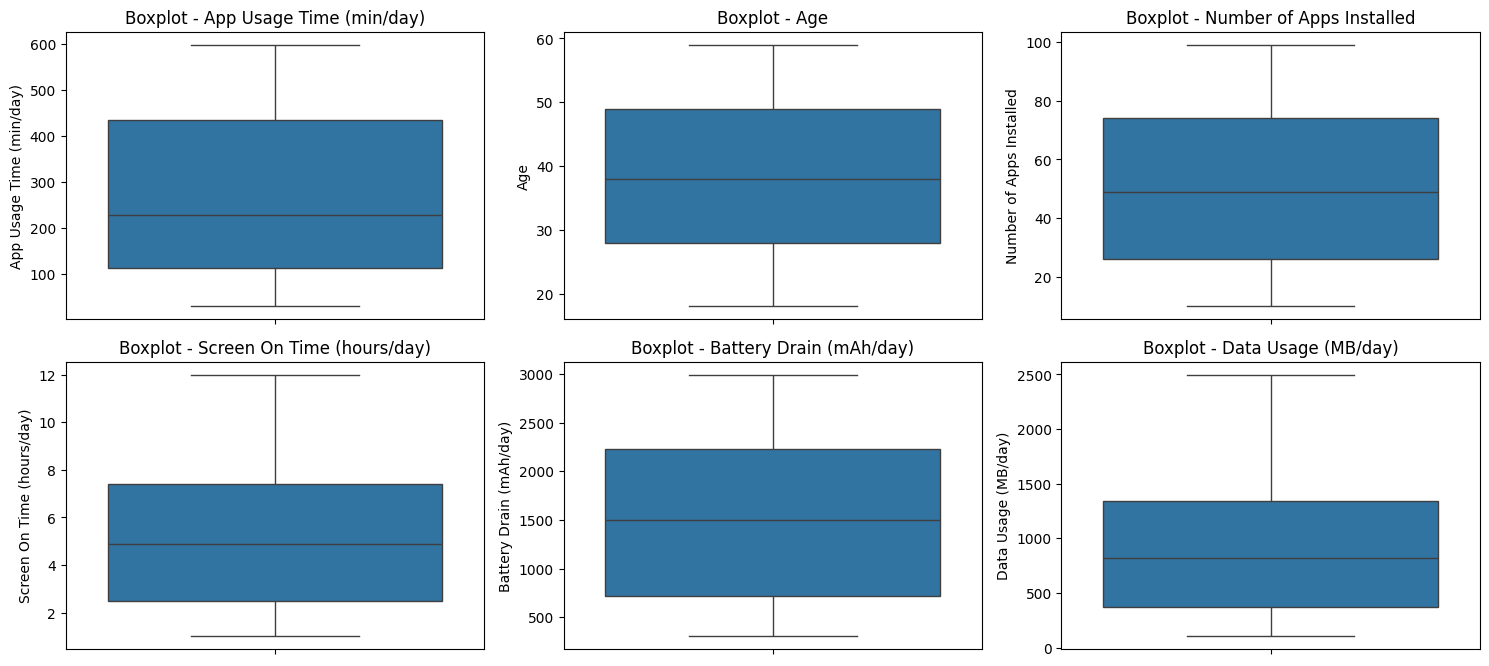

In [ ]:
# Crear box plots para cada columna numérica
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=columna)
    plt.title(f'Boxplot - {columna}')
plt.tight_layout()
plt.show()

Al aplicar las técnicas de **rango intercuartílico (IQR), puntuación Z y visualización de valores atípicos con gráficos de caja (Box Plots)** para identificar valores atípicos en las columnas numéricas del conjunto de datos, se observa que **no hay valores atípicos** en ninguna de las columnas. Esto sugiere que los datos en todas las variables están dentro de un rango esperado y no muestran valores inusualmente altos o bajos que podrían distorsionar el análisis.

Dado que no se encontraron valores atípicos, no es necesario aplicar técnicas de eliminación o imputación de datos. Lo que significa que el conjunto de datos puede utilizarse en su estado actual sin necesidad de ajustes adicionales para el tratamiento de valores extremos. Lo que facilita el análisis posterior, ya que la información registrada representa de manera adecuada el comportamiento de los usuarios sin riesgo de sesgo por valores fuera de lo común.

### **Nivel de Granularidad**

El nivel de granularidad del dataset es diario, ya que los registros representan datos de uso de dispositivos móviles para cada usuario de manera individualizada, sin un período de tiempo explícito más amplio (como semanas o meses). En este caso, cada fila en el conjunto de datos corresponde a un único usuario con su respectiva información de uso diario (por ejemplo, tiempo de uso de aplicaciones, consumo de batería, etc.). En este caso, no se requiere un ajuste de granularidad temporal, pero se realizará un ajuste de las variables demográficas para facilitar el análisis, en este caso la variable Age(edad),para poder analizar los patrones de comportamiento por grupos, será necesario agregar las edades en rangos (18-24 --> Jóven, 25-34 --> Adulto Jóven, 35-44 --> Adulto, >45 -->Adulto Mayor). Esto permite segmentar a los usuarios en rangos de edad más representativos y facilitar el análisis de cómo las diferentes edades impactan el comportamiento de uso del dispositivo móvil y responder algunas de las hipótesis que se plantearon con la edad con usuarios entre los 18-24 años y mayores de 45 años por lo que se distribuye en los rangos anteriores.

La variable género ya está segmentada en dos opciones: femenino y masculino. No se requiere ajuste adicional para esta variable, ya que es binaria y permite hacer comparaciones directas entre ambos géneros en cuanto al uso de dispositivos móviles.

## **II. Limpieza y Transformación de Datos:**

Según el punto anterior, realiza la limpieza de datos, considerando solo los aspectos que apliquen para su dataset:

*Eliminación de Duplicados
Revisa y elimina las filas duplicadas identificadas en el dataset. Esto ayudará a reducir sesgos y evitar resultados inflados en los análisis posteriores.

*Instrucción: Usa el método drop_duplicates() de pandas y confirma que no queden duplicados en el dataset.
Tratamiento de Valores Nulos
Basado en la evaluación anterior de los valores nulos, implementa alguna de estrategias para manejar los datos faltantes según la relevancia de cada variable:

*Imputación de datos numéricos críticos: Completa los valores nulos en columnas numéricas importantes (por ejemplo, con la media o mediana según la distribución).
Eliminación o imputación de variables categóricas con valores nulos: Usa la moda para variables categóricas o considera eliminar filas con valores nulos si el porcentaje es bajo y su eliminación no afecta los resultados.

Instrucción: Usa métodos como fillna() o dropna() según el caso.
Ajuste de Tipos de Datos
Asegúrate de que cada columna tenga el tipo de dato adecuado según su contenido. Esto optimizará el manejo de memoria y mejorará la precisión de los análisis.

Revisa y convierte columnas que requieren un tipo específico, como convertir variables de fecha con pd.to_datetime() y valores categóricos a tipo category.
Detección y Tratamiento de Valores Atípicos
Examina las variables numéricas para identificar valores atípicos que podrían distorsionar el análisis.

Utiliza boxplots para visualizar valores atípicos. Luego, evalúa si es adecuado eliminarlos o tratarlos con técnicas como el recorte (trimming) o winsorización.
Correcciones de Valores con replace, map y zip
Realiza correcciones en valores específicos en las columnas que contienen errores tipográficos o inconsistencias. Estas herramientas te permitirán reemplazar valores incorrectos de forma rápida y precisa.

Usa replace() para cambiar valores puntuales, map() para transformar columnas completas usando un diccionario de equivalencias, y zip() si necesitas hacer ajustes combinados en varias columnas. Por ejemplo, podrías usar un diccionario con map() para corregir nombres de ciudades o categorías.
Agregación de Datos : Realiza agregaciones en el conjunto de datos cuando su nivel de detalle sea mayor al necesario.

Usa groupby() para agrupar los datos según columnas clave que definan el nivel de agregación requerido. Después de agrupar, aplica funciones de agregación como sum(), mean(), count() o median() según el análisis que desees realizar. Por ejemplo, podrías agrupar por mes_pedido y Categoría para calcular el total de ventas por mes y categoría de producto.

In [ ]:
#ajuste de datos
#Convertir 'Screen On Time' de horas a minutos
df['Screen On Time (min/day)'] = df['Screen On Time (hours/day)'] * 60

# Eliminar la columna original
df.drop(columns=['Screen On Time (hours/day)'], inplace=True)


In [ ]:
print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                     1872                        67                 1122   
1                     1331                        42                  944   
2                      761                        32                  322   
3                     1676                        56                  871   
4                     1367                        58                  988   

   Age  Gender  User Behavior Class  Screen On Time (min/day)  
0   40    Male                    

In [ ]:
#verificar la conversión a minutos
print(df['Screen On Time (min/day)'].describe())

count    700.000000
mean     316.362857
std      184.115035
min       60.000000
25%      150.000000
50%      294.000000
75%      444.000000
max      720.000000
Name: Screen On Time (min/day), dtype: float64


In [ ]:
#columnas categoricas a tipo "category"
columnas_categoricas = ['Device Model', 'Operating System', 'Gender']
for col in columnas_categoricas:
    df[col] = df[col].astype('category')

In [ ]:
#Validar los cambios realizados
print(df.dtypes)

User ID                        int64
Device Model                category
Operating System            category
App Usage Time (min/day)       int64
Battery Drain (mAh/day)        int64
Number of Apps Installed       int64
Data Usage (MB/day)            int64
Age                            int64
Gender                      category
User Behavior Class            int64
Screen On Time (min/day)     float64
dtype: object


In [ ]:
#verificar el ahorro de memoria
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   User ID                   700 non-null    int64   
 1   Device Model              700 non-null    category
 2   Operating System          700 non-null    category
 3   App Usage Time (min/day)  700 non-null    int64   
 4   Battery Drain (mAh/day)   700 non-null    int64   
 5   Number of Apps Installed  700 non-null    int64   
 6   Data Usage (MB/day)       700 non-null    int64   
 7   Age                       700 non-null    int64   
 8   Gender                    700 non-null    category
 9   User Behavior Class       700 non-null    int64   
 10  Screen On Time (min/day)  700 non-null    float64 
dtypes: category(3), float64(1), int64(7)
memory usage: 46.4 KB
None


### **Correcciones de Valores con replace**

In [ ]:
# Diccionario para reemplazar los valores numéricos con categorías más descriptivas para la variable User Behavior Class
valores = {
    1: 'Uso leve',
    2: 'Uso moderadamente bajo',
    3: 'Uso moderado',
    4: 'Uso moderadamente alto',
    5: 'Uso extremo'
}

# Reemplazar los valores de la columna 'User Behavior Class' con los nombres descriptivos
df['User Behavior Class'] = df['User Behavior Class'].replace(valores)

# Verificamos el resultado
df['User Behavior Class'].value_counts()

,count
User Behavior Class,
Uso moderadamente bajo,146
Uso moderado,143
Uso moderadamente alto,139
Uso extremo,136
Uso leve,136


In [ ]:
df.head() #verificar en el dataframe los datos de las primeras 5 filas

,User ID,Device Model,Operating System,App Usage Time (min/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Screen On Time (min/day)
0,1,Google Pixel 5,Android,393,1872,67,1122,40,Male,Uso moderadamente alto,384.0
1,2,OnePlus 9,Android,268,1331,42,944,47,Female,Uso moderado,282.0
2,3,Xiaomi Mi 11,Android,154,761,32,322,42,Male,Uso moderadamente bajo,240.0
3,4,Google Pixel 5,Android,239,1676,56,871,20,Male,Uso moderado,288.0
4,5,iPhone 12,iOS,187,1367,58,988,31,Female,Uso moderado,258.0


### **Agregación de Datos**

In [ ]:
# Función para categorizar los dispositivos según su gama
def categorizar_gama(dispositivo):
    if dispositivo in ["iPhone 12", "Xiaomi Mi 11", "OnePlus 9", "Samsung Galaxy S21",]:
        return "Gama Alta"
    elif dispositivo == "Google Pixel 5":
        return "Gama Media"
    else:
        return "Gama Desconocida"

# Aplicar la función al dataframe para crear una nueva columna 'Gama'
df['Gama'] = df['Device Model'].apply(categorizar_gama)

In [ ]:
# Rango para la edad
def rango_etareo(edad):
    if edad < 25:
        rango = "Jóven"
    elif edad < 35:
        rango = "Adulto Jóven"
    elif edad < 45:
        rango = "Adulto"
    else:
        rango = 'Adulto Mayor'
    return rango

In [ ]:
# Aplicar la función al dataframe para crear una nueva columna 'rango_edad'
df['rango_edad'] = df['Age'].apply(rango_etareo)

In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Screen On Time (min/day),Gama,rango_edad
0,1,Google Pixel 5,Android,393,1872,67,1122,40,Male,Uso moderadamente alto,384.0,Gama Media,Adulto
1,2,OnePlus 9,Android,268,1331,42,944,47,Female,Uso moderado,282.0,Gama Alta,Adulto Mayor
2,3,Xiaomi Mi 11,Android,154,761,32,322,42,Male,Uso moderadamente bajo,240.0,Gama Alta,Adulto
3,4,Google Pixel 5,Android,239,1676,56,871,20,Male,Uso moderado,288.0,Gama Media,Jóven
4,5,iPhone 12,iOS,187,1367,58,988,31,Female,Uso moderado,258.0,Gama Alta,Adulto Jóven


In [ ]:
# Agrupar por 'Rango Edad'
df_agrupado_edad = df.groupby('rango_edad').agg({
    'Number of Apps Installed': ['mean', 'sum'],  # Número promedio y total de aplicaciones instaladas
    'App Usage Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo en aplicaciones
    'Screen On Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo de pantalla
    'Battery Drain (mAh/day)': ['mean', 'sum'],  # Promedio y total de consumo de batería
    'Data Usage (MB/day)': ['mean', 'sum']  # Promedio y total de consumo de datos
}).reset_index()

df_agrupado_edad

rango_edad Number of Apps Installed        App Usage Time (min/day)  \
                                    mean    sum                     mean   
0        Adulto                46.913580   7600               253.382716   
1  Adulto Jóven                48.043956   8744               256.901099   
2  Adulto Mayor                52.906504  13015               281.398374   
3         Jóven                55.618182   6118               297.836364   

         Screen On Time (min/day)          Battery Drain (mAh/day)          \
     sum                     mean      sum                    mean     sum   
0  41048               296.888889  48096.0             1420.141975  230063   
1  46756               301.318681  54840.0             1455.362637  264876   
2  69224               330.707317  81354.0             1582.020325  389177   
3  32762               337.854545  37164.0             1668.136364  183495   

  Data Usage (MB/day)          
                 mean     sum  
0          855.493827  138590  
1          885.379121  161139  
2          974.247967  239665  
3         1012.963636  111426

In [ ]:
# Agrupación por Género
df_agrupado_genero = df.groupby('Gender').agg({
    'App Usage Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo en aplicaciones
    'Screen On Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo de pantalla
    'Battery Drain (mAh/day)': ['mean', 'sum'],  # Promedio y total de consumo de batería
    'Number of Apps Installed': ['mean', 'sum'],  # Promedio y total de aplicaciones instaladas
    'Data Usage (MB/day)': ['mean', 'sum']  # Promedio y total de consumo de datos
}).reset_index()

df_agrupado_genero

<ipython-input-27-8467a7b48c9f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_genero = df.groupby('Gender').agg({


Gender App Usage Time (min/day)        Screen On Time (min/day)            \
                              mean    sum                     mean       sum   
0  Female               271.967262  91381               315.678571  106068.0   
1    Male               270.354396  98409               316.994505  115386.0   

  Battery Drain (mAh/day)         Number of Apps Installed         \
                     mean     sum                     mean    sum   
0             1519.815476  510658                50.226190  16876   
1             1530.090659  556953                51.101648  18601   

  Data Usage (MB/day)          
                 mean     sum  
0          914.321429  307212  
1          943.978022  343608

In [ ]:
# Agrupación por clase de comportamiento
df_agrupado_comportamiento = df.groupby('User Behavior Class').agg({
    'App Usage Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo en aplicaciones
    'Screen On Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo de pantalla
    'Battery Drain (mAh/day)': ['mean', 'sum'],  # Promedio y total de consumo de batería
    'Number of Apps Installed': ['mean', 'sum'],  # Promedio y total de aplicaciones instaladas
    'Data Usage (MB/day)': ['mean', 'sum'],  # Promedio y total de consumo de datos
}).reset_index()

df_agrupado_comportamiento

User Behavior Class App Usage Time (min/day)         \
                                              mean    sum   
0             Uso extremo               541.419118  73633   
1                Uso leve                60.426471   8218   
2  Uso moderadamente alto               395.748201  55009   
3  Uso moderadamente bajo               131.972603  19268   
4            Uso moderado               235.398601  33662   

  Screen On Time (min/day)          Battery Drain (mAh/day)          \
                      mean      sum                    mean     sum   
0               606.882353  82536.0             2701.014706  367338   
1                89.426471  12162.0              454.977941   61877   
2               414.561151  57624.0             2105.805755  292707   
3               182.260274  26610.0              883.808219  129036   
4               297.356643  42522.0             1515.055944  216653   

  Number of Apps Installed        Data Usage (MB/day)          
                      mean    sum                mean     sum  
0                89.250000  12138         1974.772059  268569  
1                14.558824   1980          202.323529   27516  
2                69.920863   9719         1232.230216  171280  
3                30.753425   4490          451.417808   65907  
4                50.000000   7150          822.013986  117548

In [ ]:
# Agrupar por 'Gama'
df_agrupado_gama = df.groupby('Gama').agg({
    'App Usage Time (min/day)': ['mean', 'sum', 'median'],  # Tiempo de uso promedio, suma y mediana
    'Screen On Time (min/day)': ['mean', 'sum', 'median'],  # Tiempo de pantalla promedio, suma y mediana
    'Battery Drain (mAh/day)': ['mean', 'sum', 'median'],  # Consumo de batería promedio, suma y mediana
    'Number of Apps Installed': ['mean', 'sum'],  # Número promedio y total de apps instaladas
    'Data Usage (MB/day)': ['mean', 'sum', 'median'],  # Consumo de datos promedio, suma y mediana
    'Age': ['mean', 'median'],  # Edad promedio y mediana
    'Gender': lambda x: x.mode()[0]  # Género más frecuente
}).reset_index()

df_agrupado_gama

Gama App Usage Time (min/day)                 \
                                  mean     sum median   
0   Gama Alta               271.978495  151764  225.5   
1  Gama Media               267.788732   38026  231.5   

  Screen On Time (min/day)                  Battery Drain (mAh/day)          \
                      mean       sum median                    mean     sum   
0               319.365591  178206.0  297.0             1537.750896  858065   
1               304.563380   43248.0  285.0             1475.676056  209546   

          Number of Apps Installed        Data Usage (MB/day)                 \
   median                     mean    sum                mean     sum median   
0  1532.5                50.878136  28390          937.896057  523346  848.0   
1  1443.0                49.908451   7087          897.704225  127474  791.0   

         Age          Gender  
        mean median <lambda>  
0  38.664875   39.0     Male  
1  37.767606   36.0     Male

In [ ]:
# tipo de datos de cada columna
tipos_de_datos = df.dtypes

# tipos de datos de manera más detallada
info_dataset = df.info()

# resumen estadístico que también incluye los tipos de datos
resumen = df.describe(include='all')

# Mostrar los resultados
print("Tipos de datos de cada columna:")
print(tipos_de_datos)
print("\nInformación del dataset:")
print(info_dataset)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   User ID                   700 non-null    int64   
 1   Device Model              700 non-null    category
 2   Operating System          700 non-null    category
 3   App Usage Time (min/day)  700 non-null    int64   
 4   Battery Drain (mAh/day)   700 non-null    int64   
 5   Number of Apps Installed  700 non-null    int64   
 6   Data Usage (MB/day)       700 non-null    int64   
 7   Age                       700 non-null    int64   
 8   Gender                    700 non-null    category
 9   User Behavior Class       700 non-null    object  
 10  Screen On Time (min/day)  700 non-null    float64 
 11  Gama                      700 non-null    object  
 12  rango_edad                700 non-null    object  
dtypes: category(3), float64(1), int64(6), object(3)
me

In [ ]:
# Agrupación por Número de Aplicaciones Instaladas
df_agrupado_apps = df.groupby('Number of Apps Installed').agg({
    'App Usage Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo en aplicaciones
    'Screen On Time (min/day)': ['mean', 'sum'],  # Promedio y total de tiempo de pantalla
    'Battery Drain (mAh/day)': ['mean', 'sum'],  # Promedio y total de consumo de batería
    'Data Usage (MB/day)': ['mean', 'sum']  # Promedio y total de consumo de datos
}).reset_index()

df_agrupado_apps

Number of Apps Installed App Usage Time (min/day)        \
                                                mean   sum   
0                        10                58.812500   941   
1                        11                54.583333   655   
2                        12                66.100000   661   
3                        13                71.928571  1007   
4                        14                61.769231   803   
..                      ...                      ...   ...   
81                       95               553.500000  2214   
82                       96               534.666667  1604   
83                       97               541.000000  3246   
84                       98               541.500000  3249   
85                       99               536.666667  4830   

   Screen On Time (min/day)         Battery Drain (mAh/day)         \
                       mean     sum                    mean    sum   
0                 84.000000  1344.0              501.437500   8023   
1                 94.000000  1128.0              401.666667   4820   
2                 88.800000   888.0              424.300000   4243   
3                 91.714286  1284.0              470.357143   6585   
4                 93.230769  1212.0              478.076923   6215   
..                      ...     ...                     ...    ...   
81               597.000000  2388.0             2818.750000  11275   
82               596.000000  1788.0             2624.333333   7873   
83               571.000000  3426.0             2689.000000  16134   
84               578.000000  3468.0             2703.833333  16223   
85               605.333333  5448.0             2620.777778  23587   

   Data Usage (MB/day)         
                  mean    sum  
0           180.937500   2895  
1           210.916667   2531  
2           195.300000   1953  
3           199.928571   2799  
4           153.230769   1992  
..                 ...    ...  
81         1618.000000   6472  
82         1992.333333   5977  
83         1911.833333  11471  
84         1979.166667  11875  
85         1997.888889  17981  

[86 rows x 9 columns]

Cambio de nombres de las columnas de Ingles a Español

In [ ]:
# Obtener el nombre de las columnas
print(df.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class', 'Screen On Time (min/day)', 'Gama',
       'rango_edad'],
      dtype='object')


In [ ]:
# Diccionario con las traducciones de los nombres de las columnas
traducciones = {
    'User ID': 'ID Usuario',
    'Device Model': 'Modelo del Dispositivo',
    'Operating System': 'Sistema Operativo',
    'App Usage Time (min/day)': 'Tiempo de Uso de Apps (min/día)',
    'Battery Drain (mAh/day)': 'Consumo de Batería (mAh/día)',
    'Number of Apps Installed': 'Número de Apps Instaladas',
    'Data Usage (MB/day)': 'Uso de Datos (MB/día)',
    'Age': 'Edad',
    'Gender': 'Género',
    'User Behavior Class': 'Clase de Comportamiento del Usuario',
    'Screen On Time (min/day)': 'Tiempo de Pantalla Encendida (min/día)'
}

# Cambiar los nombres de las columnas
df.rename(columns=traducciones, inplace=True)

# Verificar el cambio
print("Columnas después de la traducción:")
print(df.columns)


Columnas después de la traducción:
Index(['ID Usuario', 'Modelo del Dispositivo', 'Sistema Operativo',
       'Tiempo de Uso de Apps (min/día)', 'Consumo de Batería (mAh/día)',
       'Número de Apps Instaladas', 'Uso de Datos (MB/día)', 'Edad', 'Género',
       'Clase de Comportamiento del Usuario',
       'Tiempo de Pantalla Encendida (min/día)', 'Gama', 'rango_edad'],
      dtype='object')


In [ ]:
# Reemplazar los valores en la columna Gender
df['Género'] = df['Género'].replace({'Male': 'Hombre', 'Female': 'Mujer'})

# Verificar los cambios realizados
print(df['Género'].unique())


['Hombre', 'Mujer']
Categories (2, object): ['Mujer', 'Hombre']


<ipython-input-42-ecd14c29d194>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Género'] = df['Género'].replace({'Male': 'Hombre', 'Female': 'Mujer'})


In [ ]:
df.head()

,ID Usuario,Modelo del Dispositivo,Sistema Operativo,Tiempo de Uso de Apps (min/día),Consumo de Batería (mAh/día),Número de Apps Instaladas,Uso de Datos (MB/día),Edad,Género,Clase de Comportamiento del Usuario,Tiempo de Pantalla Encendida (min/día),Gama,rango_edad
0,1,Google Pixel 5,Android,393,1872,67,1122,40,Hombre,Uso moderadamente alto,384.0,Gama Media,Adulto
1,2,OnePlus 9,Android,268,1331,42,944,47,Mujer,Uso moderado,282.0,Gama Alta,Adulto Mayor
2,3,Xiaomi Mi 11,Android,154,761,32,322,42,Hombre,Uso moderadamente bajo,240.0,Gama Alta,Adulto
3,4,Google Pixel 5,Android,239,1676,56,871,20,Hombre,Uso moderado,288.0,Gama Media,Jóven
4,5,iPhone 12,iOS,187,1367,58,988,31,Mujer,Uso moderado,258.0,Gama Alta,Adulto Jóven


El cambio de nombres de las columnas y el contenido de la columna "Género" con términos en inglés a sus equivalentes en español se realizó para garantizar la uniformidad en la visualización de los datos, evitando una mezcla de idiomas que podría dificultar la comprensión y el análisis.

Al tener nombres de columnas en un solo idioma, se mejora la claridad, la accesibilidad y la consistencia del dataset.

Esta acción mejora la colaboración y presentación del dataset, asegurando que sea comprensible y funcional en cualquier contexto donde se utilice.

## **III. Validación:**


Una vez que hayas realizado la limpieza y transformación de datos, es crucial evaluar si el conjunto de datos modificado aún permite abordar las preguntas de negocio y los objetivos de análisis iniciales.

 Revisa los objetivos de análisis definidos al inicio del proyecto y verifica si el dataset limpio contiene la información necesaria. Evalúa aspectos como:

*   **Completitud de los Datos:** Asegúrate de que no haya valores nulos en columnas críticas que afecten los resultados y que no se hayan perdido datos al momento de hacer el groupby

*   **Relevancia de las Variables:** Confirma que las variables son pertinentes para responder a las preguntas planteadas.

*   **Granularidad Adecuada:** Verifica que el nivel de detalle en el dataset sea suficiente para proporcionar insights significativos.

In [ ]:
# Calcular la completitud total del dataset
total_celdas = df.size
celdas_no_nulas = df.count().sum()
completitud = (celdas_no_nulas / total_celdas) * 100

# Mostrar la completitud
print(f"Completitud del dataset: {completitud:.2f}%")

# Verificar si hay algún valor nulo
hay_valores_nulos = df.isnull().values.any()

print(f"¿Hay valores nulos en el dataset? {'Sí' if hay_valores_nulos else 'No'}")

Completitud del dataset: 100.00%
¿Hay valores nulos en el dataset? No


El análisis de la completitud de los datos muestra que no existen valores nulos en las columnas críticas seleccionadas. Es decir, todas las columnas esenciales como el tiempo de uso de aplicaciones, el drenaje de batería, la cantidad de aplicaciones instaladas, el uso de datos, la edad y el género están completas, lo cual es una excelente señal para la calidad del dataset.

In [ ]:
#Verificar el número de registros del dataset después del Groupby
num_registros = len(df)
print("Número de registros en el dataset:", num_registros)

Número de registros en el dataset: 700


Como parte del proceso de validación de la completitud de los datos, se verifica que, después de realizar las operaciones de **groupby** en el dataset, no se vea afectado el total de registros presentes

### **Relevancia de las variables**

El conjunto de datos limpio contiene las variables relevantes que siguen siendo útiles para responder a la pregunta de investigación y cumplir el objetivo planteados. Las variables clave, como el tiempo de uso de aplicaciones, el consumo de batería, el consumo de datos, la edad, el género, y la clasificación de comportamiento son esenciales.

La segmentación de edad en rangos y el análisis comparativo de género también permitirá una interpretación más clara de cómo las características demográficas afectan el comportamiento de los usuarios.



**Variables del Dataset:**

**User ID:** Identificador único para cada usuario.

Relevancia: Es crucial para identificar a cada usuario, pero no es directamente relevante para las preguntas de análisis de comportamiento.

**Device Model:** Modelo del dispositivo móvil.

Relevancia: Esta variable no es esencial para el objetivo principal del análisis, que se centran más en la interacción del usuario con el dispositivo que en el dispositivo mismo.

**Operating System:**
Relevancia: Aunque el sistema operativo podría ser un factor interesante para ciertos análisis, como el comportamiento de los usuarios en plataformas distintas, no es una variable principal para las preguntas iniciales, que se enfocan en el comportamiento del usuario y no tanto en el dispositivo o sistema operativo. Sin embargo, podrías incluirlo como una variable adicional si consideras que podría tener impacto en el análisis.

**App Usage Time (Tiempo de uso de aplicaciones):** El tiempo diario que el usuario pasa en aplicaciones móviles (en minutos).

Relevancia: Esta es una de las variables clave para el análisis. Está directamente relacionada con la pregunta sobre cómo varía el tiempo de uso entre grupos de edad y género y es esencial para medir el comportamiento de uso de los dispositivos móviles.

**Screen On Time (Tiempo de pantalla activa):** El tiempo promedio diario que el dispositivo está encendido.

Relevancia: Esta es una variable muy relevante para evaluar el nivel de interacción con el dispositivo. Se puede comparar con el tiempo de uso de aplicaciones y con el consumo de batería, ayudando a responder la pregunta sobre los patrones de uso y cómo varían según la edad y el género.

**Battery Drain (Consumo de batería):** El consumo diario de batería (en mAh).

Relevancia: Es relevante para evaluar si el mayor uso de aplicaciones y el tiempo de pantalla activa están asociados con un mayor consumo de batería. Esta variable es fundamental para entender cómo los usuarios gestionan la energía de sus dispositivos y cómo este consumo puede estar vinculado con su comportamiento.

**Number of Apps Installed (Número de aplicaciones instaladas):** Total de aplicaciones disponibles en el dispositivo.

Relevancia: Esta variable es útil para analizar si el número de aplicaciones instaladas influye en el comportamiento de los usuarios en cuanto a consumo de batería y uso de datos. Aunque no es fundamental para la pregunta de investigación, puede proporcionar insights adicionales sobre las preferencias de los usuarios en cuanto a la cantidad de aplicaciones que utilizan. Esta variable también puede influir en el consumo de datos y en el tiempo de uso de aplicaciones.

**Data Usage (Consumo de datos):** El consumo diario de datos móviles (en megabytes).

Relevancia: Esta variable es clave para responder a la pregunta sobre si los usuarios que pasan más tiempo usando aplicaciones también consumen más datos móviles. Es directamente relevante para evaluar la relación entre el tiempo de uso de aplicaciones y el consumo de datos.

**Age (Edad):** La edad del usuario.

Relevancia: La edad es crucial para analizar cómo las variaciones en el comportamiento de uso (tiempo de uso de aplicaciones, consumo de batería, consumo de datos, etc.) se distribuyen según grupos de edad. Es esencial para abordar varias hipótesis, el objetivo y la pregunta de investigación.

**Gender (Género):** Género del usuario (masculino o femenino).

Relevancia: El género también es importante para analizar cómo las diferencias de comportamiento de uso pueden variar entre los grupos de género. Esta variable será útil para responder a la pregunta de investigación relacionadas con las diferencias en el comportamiento de uso entre hombres y mujeres.

**User Behavior Class (Clasificación de comportamiento del usuario):** Clasificación del comportamiento del usuario basada en patrones de uso.

Relevancia: Esta variable es muy valiosa para segmentar a los usuarios en diferentes categorías de comportamiento y es clave para comprender cómo el uso de dispositivos varía según la edad, el género, el número de aplicaciones instaladas, el consumo de batería y el uso de datos.


### **Granularidad Adecuada**

La granularidad del conjunto de datos es adecuada para responder a la pregunta de investigación y probar las hipótesis planteadas. Al contar con información a nivel de usuario, el conjunto de datos permite realizar análisis segmentados según factores clave como edad, género, número de aplicaciones instaladas, tiempo de uso de aplicaciones, consumo de batería y consumo de datos. Esto es suficiente para abordar las preguntas sobre las variaciones en los patrones de uso de dispositivos móviles entre diferentes grupos demográficos, y para verificar las hipótesis relacionadas con los patrones de comportamiento y consumo de recursos.

Lo que significa que para el análisis propuesto, la información disponible en el conjunto de datos es suficiente y proporciona los insights necesarios para responder a la pregunta de investigación y explorar las relaciones entre los factores de uso de dispositivos móviles y las características demográficas de los usuarios. En este sentido, la granularidad actual del conjunto de datos cubre adecuadamente las necesidades de análisis sin requerir mayores modificaciones.

Por otro lado, si a futuro se desea realizar un análisis más detallado, como observar cómo los patrones de uso cambian a lo largo del tiempo o identificar variaciones geográficas, será necesario complementar el conjunto de datos con información temporal, geográfica y el tipo de aplicaciones utilizadas.

